# Challenge: model comparison

You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.


**KNN is a non-parametric model, whereas LR is a parametric model.**
**KNN is slow in real time as it have to keep track of all training data and find the neighbor nodes, whereas LR can easily extract output from the tuned θ coefficients.**

# OLS Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Ecommerce Customers.csv")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [116]:
features=df.dtypes[df.dtypes!='object'].index

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
X = df[['Time on Website','Length of Membership']]
y = df["Yearly Amount Spent"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]



The number of observations in training set is 400
The number of observations in test set is 100


In [126]:
from sklearn.linear_model import LinearRegression

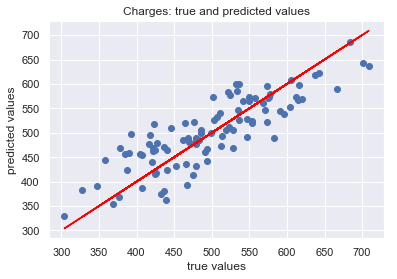

R-squared of the model in training set is: 0.6410108327037456
-----Test set statistics-----
R-squared of the model in test set is: 0.7083995771379743
Mean absolute error of the prediction is: 36.93255462393793
Mean squared error of the prediction is: 2004.219587362711
Root mean squared error of the prediction is: 44.76851111398179
Mean absolute percentage error of the prediction is: 7.797740125202026


In [127]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)


plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

In [141]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [148]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    
    y_preds_train = model.predict(X_train)
    y_preds_test = model.predict(X_test)
    print("K = {}, R-squared of the model in training set is: {}".format(K, model.score(X_train, y_train)))
    print("K = {}, Root mean squared error of the prediction is: {}".format(K, rmse(y_test, y_preds_test)))

K = 1, R-squared of the model in training set is: 1.0
K = 1, Root mean squared error of the prediction is: 64.68095200941791
K = 2, R-squared of the model in training set is: 0.8296118550612738
K = 2, Root mean squared error of the prediction is: 61.89010817696325
K = 3, R-squared of the model in training set is: 0.7543191618970067
K = 3, Root mean squared error of the prediction is: 56.570323017139195
K = 4, R-squared of the model in training set is: 0.715582671333205
K = 4, Root mean squared error of the prediction is: 54.52816134328275
K = 5, R-squared of the model in training set is: 0.6855511089785948
K = 5, Root mean squared error of the prediction is: 52.483618616504906
K = 6, R-squared of the model in training set is: 0.6745429050512721
K = 6, Root mean squared error of the prediction is: 51.491646942572245
K = 7, R-squared of the model in training set is: 0.6480292788493915
K = 7, Root mean squared error of the prediction is: 50.771424570836096
K = 8, R-squared of the model in

OLS Regression is better regarding the RMSE value.